# KAGGLE-NYC-AIRBNB

This Jupyter Notebook file contains parts of the code for the final project, but with added testing/debugging code and quick visualizations.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [3]:
data = pd.read_csv("../data/AB_NYC_2019.csv", index_col=0)
print("Initial size:",len(data), "x", len(data.columns))
# Removing the columns with a lot (20%) of missing values
data = data.drop(columns=['last_review', 'reviews_per_month'])
# Removing the rows with some missing values (37 rows)
data = data.dropna()
data

Initial size: 48895 x 15


name   host_id  \
id                                                                      
2539                     Clean & quiet apt home by the park      2787   
2595                                  Skylit Midtown Castle      2845   
3647                    THE VILLAGE OF HARLEM....NEW YORK !      4632   
3831                        Cozy Entire Floor of Brownstone      4869   
5022       Entire Apt: Spacious Studio/Loft by central park      7192   
...                                                     ...       ...   
36484665    Charming one bedroom - newly renovated rowhouse   8232441   
36485057      Affordable room in Bushwick/East Williamsburg   6570630   
36485431            Sunny Studio at Historical Neighborhood  23492952   
36485609               43rd St. Time Square-cozy single bed  30985759   
36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

              host_name neighbourhood_group       neighbourhood  latitude  \
id                                                                          
2539               John            Brooklyn          Kensington  40.64749   
2595           Jennifer           Manhattan             Midtown  40.75362   
3647          Elisabeth           Manhattan              Harlem  40.80902   
3831        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
5022              Laura           Manhattan         East Harlem  40.79851   
...                 ...                 ...                 ...       ...   
36484665        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
36485057        Marisol            Brooklyn            Bushwick  40.70184   
36485431  Ilgar & Aysel           Manhattan              Harlem  40.81475   
36485609            Taz           Manhattan      Hell's Kitchen  40.75751   
36487245     Christophe           Manhattan      Hell's Kitchen  40.76404   

          longitude        room_type  price  minimum_nights  \
id                                                            
2539      -73.97237     Private room    149               1   
2595      -73.98377  Entire home/apt    225               1   
3647      -73.94190     Private room    150               3   
3831      -73.95976  Entire home/apt     89               1   
5022      -73.94399  Entire home/apt     80              10   
...             ...              ...    ...             ...   
36484665  -73.94995     Private room     70               2   
36485057  -73.93317     Private room     40               4   
36485431  -73.94867  Entire home/apt    115              10   
36485609  -73.99112      Shared room     55               1   
36487245  -73.98933     Private room     90               7   

          number_of_reviews  calculated_host_listings_count  availability_365  
id                                                                             
2539                      9                               6               365  
2595                     45                               2               355  
3647                      0                               1               365  
3831                    270                               1               194  
5022                      9                               1                 0  
...                     ...                             ...               ...  
36484665                  0                               2                 9  
36485057                  0                               2                36  
36485431                  0                               1                27  
36485609                  0                               6                 2  
36487245                  0                               1                23  

[48858 rows x 13 columns]

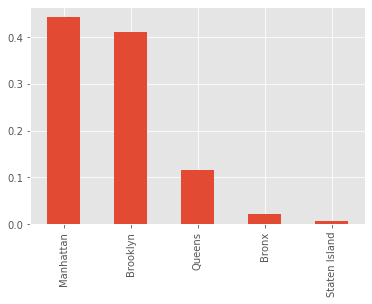

In [4]:
(data['neighbourhood_group'].value_counts()/sum(data['neighbourhood_group'].value_counts())).plot(kind='bar')

In [5]:
(data['room_type'].value_counts()/sum(data['room_type'].value_counts())).plot(kind='bar')

In [6]:
sns.scatterplot(x ="room_type", y ="price", data = data)

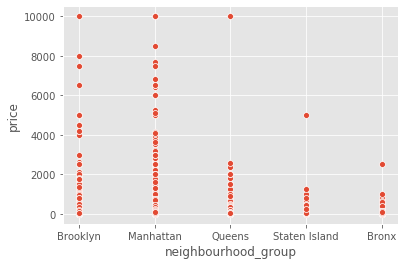

In [7]:
sns.scatterplot(x ="neighbourhood_group", y ="price", data = data)

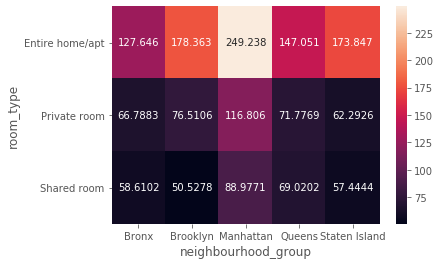

In [8]:
tab = pd.crosstab(data['room_type'],data['neighbourhood_group'], aggfunc='mean', values=data['price'])
sns.heatmap(tab,annot=True, fmt='g')

In [ ]:
tab2 = pd.crosstab(data['neighbourhood'],data['room_type'], aggfunc='mean', values=data['price'])
tab2.sort_values('neighbourhood', ascending=False).plot(kind='barh', figsize=(10,70))

In [ ]:
plt.figure(figsize=(10,50))
data['price'].groupby(data['neighbourhood']).mean().sort_values().plot(kind='barh')

In [ ]:
# Itemset mining
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Setup data
# ...
apriori(data, min_support=5/len(data), use_colnames=True)

In [5]:
data.price.max()

10000

In [10]:
data2 = data.copy()
price_cats1 = pd.cut(data2['price'], bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000], include_lowest=True)
price_cats1.value_counts(sort=False).plot(kind='bar', figsize=(6,4), title='Price')

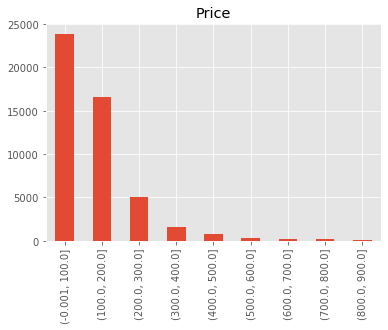

In [11]:
price_cats2 = pd.cut(data2['price'], bins=[0,100,200,300,400,500,600,700,800,900], include_lowest=True)
price_cats2.value_counts(sort=False).plot(kind='bar', figsize=(6,4), title='Price')

1    25393
0    22306
2     1159
Name: room_type, dtype: int64


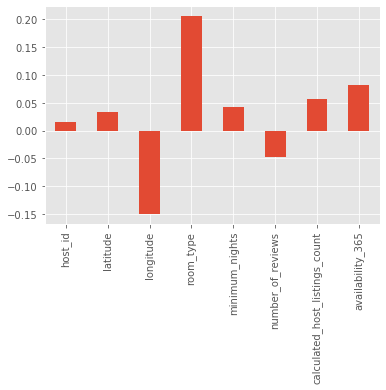

In [12]:
data2 = data2.replace('Private room', 0)
data2 = data2.replace('Entire home/apt', 1)
data2 = data2.replace('Shared room', 2)
print(data2.room_type.value_counts())
data2.drop(columns=['price']).corrwith(data2['price']).plot(figsize=(6,4), kind='bar')

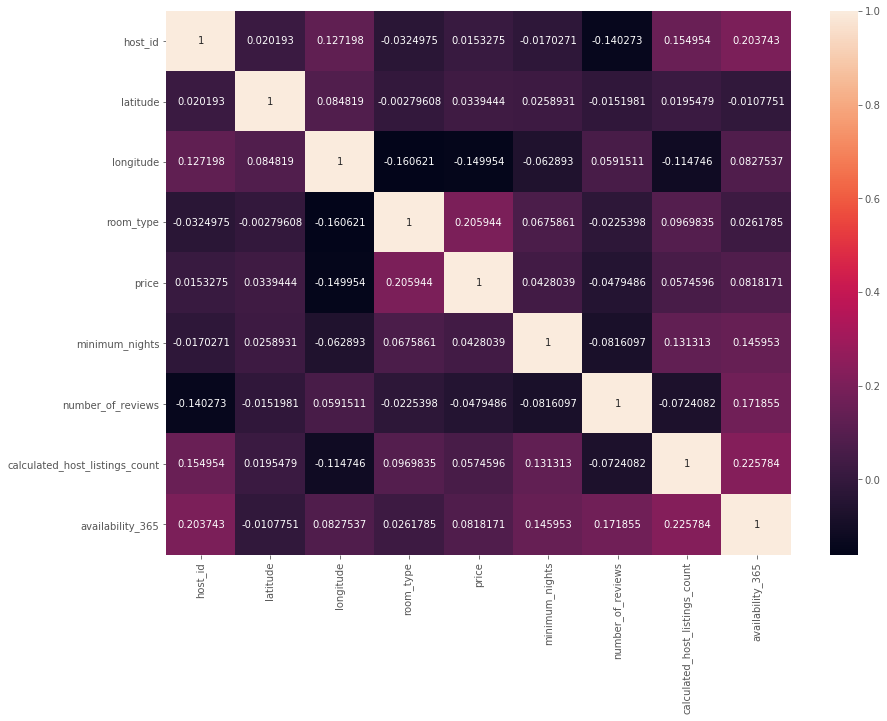

In [13]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 14,10
sns.heatmap(data2.corr(),annot=True, fmt='g')

In [21]:
sns.pairplot(data=data2, x_vars=['host_id', 'latitude', 'longitude', 'minimum_nights', 'room_type', 'availability_365'], y_vars=['price'], kind='scatter')

In [85]:
box = (round(data.longitude.min(),4), round(data.longitude.max(),4), round(data.latitude.min(),4), round(data.latitude.max(),4))
box

(-74.2444, -73.713, 40.4998, 40.9131)

In [135]:
fig, ax = plt.subplots()
ax.scatter(data[data.room_type=="Private room"].longitude, 
           data[data.room_type=="Private room"].latitude, 
           alpha= 0.7, c='tab:blue', s=12)

# Less opacity due to it being way too dense and bright
ax.scatter(data[data.room_type=="Entire home/apt"].longitude, 
           data[data.room_type=="Entire home/apt"].latitude, 
           alpha= 0.25, c='tab:orange', s=12)

ax.scatter(data[data.room_type=="Shared room"].longitude, 
           data[data.room_type=="Shared room"].latitude, 
           alpha= 0.7, c='tab:green', s=12)

ax.set_xlim(box[0],box[1])
ax.set_ylim(box[2],box[3])

# Update the legend opacity and size for better visibility
legend = ax.legend(['Private room', 'Entire home/apt', 'Shared room'])
for lh in legend.legendHandles: 
    lh.set_alpha(1)
    lh.set_sizes([30])
    
ax.imshow(plt.imread("../data/NYC.jpg"), zorder=0, extent = box, aspect='equal')

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['price', 'name', 'host_name']), 
                                                    data['price'], test_size = 0.30, random_state = 0)

In [5]:
train = X_train.copy()
train['source'] = 'train'
test = X_test.copy()
test['source'] = 'test'

data3 = pd.concat([train, test])

data_dum = pd.get_dummies(data3, columns=data3.drop(columns=['source']).select_dtypes(object).columns)
data_dum.head()

host_id  latitude  longitude  minimum_nights  number_of_reviews  \
id                                                                            
6323975    32904968  40.75815  -73.99374               1                  0   
26985149    1836803  40.68872  -73.93183               3                  1   
26925980   38593087  40.70685  -73.96663               1                 25   
35600877  163625145  40.64468  -73.99026               2                  2   
35985735   70538107  40.68834  -73.90714               1                  0   

          calculated_host_listings_count  availability_365 source  \
id                                                                  
6323975                                1                 0  train   
26985149                               1                17  train   
26925980                               2                64  train   
35600877                               3               180  train   
35985735                               1                16  train   

          neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  ...  \
id                                                                 ...   
6323975                           0                             0  ...   
26985149                          0                             1  ...   
26925980                          0                             1  ...   
35600877                          0                             1  ...   
35985735                          0                             1  ...   

          neighbourhood_Williamsburg  neighbourhood_Willowbrook  \
id                                                                
6323975                            0                          0   
26985149                           0                          0   
26925980                           1                          0   
35600877                           0                          0   
35985735                           0                          0   

          neighbourhood_Windsor Terrace  neighbourhood_Woodhaven  \
id                                                                 
6323975                               0                        0   
26985149                              0                        0   
26925980                              0                        0   
35600877                              0                        0   
35985735                              0                        0   

          neighbourhood_Woodlawn  neighbourhood_Woodrow  \
id                                                        
6323975                        0                      0   
26985149                       0                      0   
26925980                       0                      0   
35600877                       0                      0   
35985735                       0                      0   

          neighbourhood_Woodside  room_type_Entire home/apt  \
id                                                            
6323975                        0                          0   
26985149                       0                          1   
26925980                       0                          0   
35600877                       0                          0   
35985735                       0                          0   

          room_type_Private room  room_type_Shared room  
id                                                       
6323975                        0                      1  
26985149                       0                      0  
26925980                       1                      0  
35600877                       1                      0  
35985735                       1                      0  

[5 rows x 237 columns]

In [6]:
train = data_dum[data_dum.source == 'train'].drop(columns=['source'])
test = data_dum[data_dum.source == 'test'].drop(columns=['source'])

In [76]:
from sklearn.linear_model import LinearRegression
df = pd.DataFrame({'id': test.index, 'actual_price': np.array(y_test)})
reg = LinearRegression()
reg_fit = reg.fit(train, y_train)
pred_linreg = reg_fit.predict(test)
df['price_linreg'] = pred_linreg

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=0)
rf_fit = rf.fit(train, y_train)
pred_rf = rf.predict(test)
df['price_rf'] = pred_rf

df

id  actual_price  price_linreg  price_rf
0      22095324            70     89.376282        60
1      36480292           120    180.861678       150
2      10729951           105     48.398863        50
3       4103970           100    129.844585        60
4      23337201            59     85.928893        60
...         ...           ...           ...       ...
14653  15067291            64     91.369756       100
14654  14716155            55     67.996095        50
14655  11023993            60     51.043572        50
14656  13264690            55     89.486879        50
14657   5067097           220    186.919898       150

[14658 rows x 4 columns]

In [78]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("RF accuracy:", round(accuracy_score(df.actual_price, df.price_rf)*100,2), "%")
#print("RF confusion matrix:")
#print(confusion_matrix(df.actual_price, df.price_rf))

RF accuracy: 8.88 %


In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(train, y_train)
pred_knn3 = knn3.predict(test)
df['price_knn3'] = pred_knn3

knn30 = KNeighborsClassifier(n_neighbors=30)
knn30.fit(train, y_train)
pred_knn30 = knn30.predict(test)
df['price_knn30'] = pred_knn30

knn100 = KNeighborsClassifier(n_neighbors=100)
knn100.fit(train, y_train)
pred_knn100 = knn100.predict(test)
df['price_knn100'] = pred_knn100

df

id  actual_price  price_linreg  price_rf  price_knn3  \
0      22095324            70     89.376282        60          57   
1      36480292           120    180.861678       150         129   
2      10729951           105     48.398863        50         125   
3       4103970           100    129.844585        60          75   
4      23337201            59     85.928893        60          59   
...         ...           ...           ...       ...         ...   
14653  15067291            64     91.369756       100          55   
14654  14716155            55     67.996095        50          40   
14655  11023993            60     51.043572        50          50   
14656  13264690            55     89.486879        50          45   
14657   5067097           220    186.919898       150          29   

       price_knn30  price_knn100  
0              250           100  
1               79            70  
2              249           150  
3              120            75  
4               50            50  
...            ...           ...  
14653           40            60  
14654           50            50  
14655           50            50  
14656          100           100  
14657           80            80  

[14658 rows x 7 columns]

<AxesSubplot:title={'center':'Price predictions'}, xlabel='price_knn100', ylabel='actual_price'>

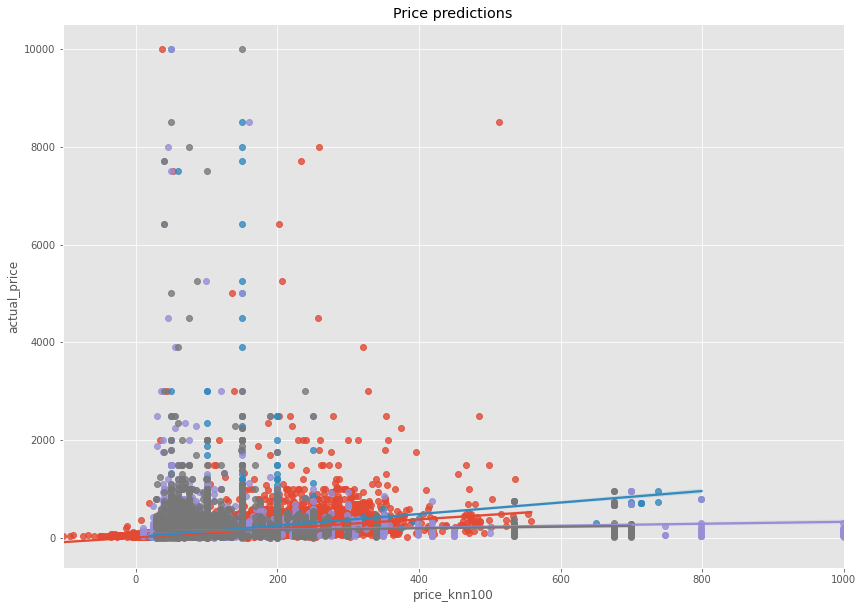

In [80]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 14,10
plt.title("Price predictions")
sns.regplot(y=df.actual_price,x=df.price_linreg)
sns.regplot(y=df.actual_price,x=df.price_rf)
#sns.regplot(y=df.actual_price,x=df.price_knn3)
sns.regplot(y=df.actual_price,x=df.price_knn30)
sns.regplot(y=df.actual_price,x=df.price_knn100)

In [84]:
print("KNN3 Accuracy:", accuracy_score(df.actual_price, df.price_knn3)*100, "%")
print("KNN3 Accuracy:", accuracy_score(df.actual_price, df.price_knn30)*100, "%")
print("KNN3 Accuracy:", accuracy_score(df.actual_price, df.price_knn100)*100, "%")

KNN3 Accuracy: 5.873925501432665 %
KNN3 Accuracy: 4.6732159912675675 %
KNN3 Accuracy: 4.291172056215036 %
